Libraries

In [48]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, brier_score_loss

import pandas as pd
import numpy as np

Load dataset

In [49]:
#import pandas as pd
df = pd.read_csv('../data/training.csv')

X = df.drop('Target', axis=1)
y = df['Target'].copy()

print('X:', X.shape, 'y:', y.shape)


X: (2563, 548) y: (2563,)


In [50]:
# Work with non-numeric features
X = X.select_dtypes(exclude=['object'])


In [51]:
from sklearn.impute import SimpleImputer

# Crear un objeto SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Puedes cambiar 'mean' por 'median', 'most_frequent', o cualquier valor constante

# Aplicar la imputación a todas las columnas
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Imprimir el DataFrame resultante con valores imputados
# print(X)


In [52]:
# Remove low variance features
selection = VarianceThreshold(threshold=(0.05)) #? 0.1
X_transformed = selection.fit_transform(X)

selected_columns = list(X.columns[selection.get_support()])
# print(selected_columns)

# X = selection.fit_transform(X)
X = X_transformed; del(X_transformed)
X.shape

(2563, 75)

In [34]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((2050, 75), (513, 75))

In [35]:
print(y_train.value_counts(), y_test.value_counts())

Target
0    1828
1     222
Name: count, dtype: int64 Target
0    457
1     56
Name: count, dtype: int64


### Build Classification models

K nearest neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier

param_dist = {
    'n_neighbors': np.arange(1, 20),            # Rango de vecinos
    'weights': ['uniform', 'distance'],         # Opciones de pesos
    'metric': ['euclidean', 'manhattan']        # Opciones de métricas de distancia
}

random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train) # Train model

knn = random_search.best_estimator_ 
print("Best hyperparameters:", random_search.best_params_)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
knn_train_brier = brier_score_loss(y_train, y_train_pred) # Calculate Brier Score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
knn_test_brier = brier_score_loss(y_test, y_test_pred) # Calculate Brier Score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('- Brier score: %s' % knn_train_brier)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)
print('- Brier score: %s' % knn_test_brier)

Best hyperparameters: {'weights': 'distance', 'n_neighbors': 18, 'metric': 'euclidean'}
Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
- Brier score: 0.0
----------------------------------
Model performance for Test set
- Accuracy: 0.8908382066276803
- MCC: 0.0
- F1 score: 0.8394083720182473
- Brier score: 0.10916179337231968


Support vector machine (Radial basis function kernel)


In [15]:
from sklearn.svm import SVC

param_dist = {
    'C': np.logspace(-3, 3, 7),            # Parámetro de regularización
    'gamma': np.logspace(-3, 3, 7),         # Parámetro del kernel RBF
    'kernel': ['linear', 'rbf']             # Tipo de kernel
}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

svm_rbf = random_search.best_estimator_ 
print("Best hyperparameters:", random_search.best_params_)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
svm_rbf_train_brier = brier_score_loss(y_train, y_train_pred) # Calculate Brier Score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
svm_rbf_test_brier = brier_score_loss(y_test, y_test_pred) # Calculate Brier Score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('- Brier score: %s' % svm_rbf_train_brier)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)
print('- Brier score: %s' % svm_rbf_test_brier)

Best hyperparameters: {'kernel': 'linear', 'gamma': 1.0, 'C': 10.0}
Model performance for Training set
- Accuracy: 0.8917073170731707
- MCC: 0.0
- F1 score: 0.8406606372407202
- Brier score: 0.10829268292682927
----------------------------------
Model performance for Test set
- Accuracy: 0.8908382066276803
- MCC: 0.0
- F1 score: 0.8394083720182473
- Brier score: 0.10916179337231968


In [37]:
from plyer import notification

notification.notify(
    title='Tarea Completada',
    message='El código ha finalizado de ejecutarse.',
    app_name='Python Notifier',
)


NotImplementedError: No usable implementation found!

Decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

param_dist = {
    'max_depth': np.arange(1, 20),            # Profundidad máxima del árbol
    'min_samples_split': np.arange(2, 10),    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': np.arange(1, 10),     # Número mínimo de muestras requeridas para estar en un nodo hoja
    'criterion': ['gini', 'entropy']          # Criterio de división ('gini' o 'entropy')
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train) # Train model

dt = random_search.best_estimator_ 
print("Best hyperparameters:", random_search.best_params_)

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
dt_train_brier = brier_score_loss(y_train, y_train_pred) # Calculate Brier Score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
dt_test_brier = brier_score_loss(y_test, y_test_pred) # Calculate Brier Score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('- Brier score: %s' % dt_train_brier)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)
print('- Brier score: %s' % dt_test_brier)

Best hyperparameters: {'min_samples_split': 8, 'min_samples_leaf': 7, 'max_depth': 4, 'criterion': 'entropy'}
Model performance for Training set
- Accuracy: 0.8946341463414634
- MCC: 0.1584582308015785
- F1 score: 0.8502163179457415
- Brier score: 0.10536585365853658
----------------------------------
Model performance for Test set
- Accuracy: 0.8908382066276803
- MCC: 0.0
- F1 score: 0.8394083720182473
- Brier score: 0.10916179337231968


Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': np.arange(10, 200, 10),          # Número de árboles en el bosque
    'max_depth': np.arange(1, 20),                   # Profundidad máxima de los árboles
    'min_samples_split': np.arange(2, 10),           # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': np.arange(1, 10),            # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': ['auto', 'sqrt', 'log2', None]  # Número máximo de características consideradas para dividir un nodo
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train) # Train model

rf = random_search.best_estimator_ 
print("Best hyperparameters:", random_search.best_params_)

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
rf_train_brier = brier_score_loss(y_train, y_train_pred) # Calculate Brier Score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
rf_test_brier = brier_score_loss(y_test, y_test_pred) # Calculate Brier Score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('- Brier score: %s' % rf_train_brier)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- Brier score: %s' % rf_test_brier)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/s

Best hyperparameters: {'n_estimators': 120, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7}
Model performance for Training set
- Accuracy: 0.8985365853658537
- MCC: 0.2379505645271336
- F1 score: 0.8565547935298281
- Brier score: 0.10146341463414635
----------------------------------
Model performance for Test set
- Accuracy: 0.8908382066276803
- MCC: 0.0
- F1 score: 0.8394083720182473
- Brier score: 0.10916179337231968


Neural network

In [40]:
from sklearn.neural_network import MLPClassifier

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],  # Tamaños de las capas ocultas
    'activation': ['logistic', 'tanh', 'relu'],                          # Funciones de activación
    'alpha': np.logspace(-5, 3, 9),                                     # Término de regularización L2
    'learning_rate': ['constant', 'invscaling', 'adaptive'],             # Tasa de aprendizaje
    'max_iter': np.arange(200, 1201, 100)                                # Número máximo de iteraciones
}

random_search = RandomizedSearchCV(MLPClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train) # Train model

mlp = random_search.best_estimator_ 
print("Best hyperparameters:", random_search.best_params_)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
mlp_train_brier = brier_score_loss(y_train, y_train_pred) # Calculate Brier Score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
mlp_test_brier = brier_score_loss(y_test, y_test_pred) # Calculate Brier Score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('- Brier score: %s' % mlp_train_brier)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)
print('- Brier score: %s' % mlp_test_brier)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best hyperparameters: {'max_iter': 700, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50, 25), 'alpha': 100.0, 'activation': 'logistic'}
Model performance for Training set
- Accuracy: 0.8917073170731707
- MCC: 0.0
- F1 score: 0.8406606372407202
- Brier score: 0.10829268292682927
----------------------------------
Model performance for Test set
- Accuracy: 0.8908382066276803
- MCC: 0.0
- F1 score: 0.8394083720182473
- Brier score: 0.10916179337231968


XGBClassifier

In [41]:
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': np.arange(50, 200, 10),          # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2, 0.3],         # Tasa de aprendizaje
    'max_depth': np.arange(3, 10),                   # Profundidad máxima del árbol
    'subsample': [0.8, 0.9, 1.0],                   # Proporción de muestras utilizadas para entrenar cada árbol
    'colsample_bytree': [0.8, 0.9, 1.0],            # Proporción de características utilizadas para entrenar cada árbol
    'gamma': [0, 1, 2]                              # Parámetro de regularización para controlar la complejidad del árbol
}

random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train) # Train model

xgbc = random_search.best_estimator_ 
print("Best hyperparameters:", random_search.best_params_)

# Make predictions
y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)

# Training set performance
xgbc_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
xgbc_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
xgbc_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
xgbc_train_brier = brier_score_loss(y_train, y_train_pred) # Calculate Brier Score

# Test set performance
xgbc_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
xgbc_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
xgbc_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
xgbc_test_brier = brier_score_loss(y_test, y_test_pred) # Calculate Brier Score

print('Model performance for Training set')
print('- Accuracy: %s' % xgbc_train_accuracy)
print('- MCC: %s' % xgbc_train_mcc)
print('- F1 score: %s' % xgbc_train_f1)
print('- Brier score: %s' % xgbc_train_brier)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % xgbc_test_accuracy)
print('- MCC: %s' % xgbc_test_mcc)
print('- F1 score: %s' % xgbc_test_f1)
print('- Brier score: %s' % xgbc_test_brier)

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 160, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.9}
Model performance for Training set
- Accuracy: 0.9014634146341464
- MCC: 0.28482531565119923
- F1 score: 0.8629182668881559
- Brier score: 0.09853658536585366
----------------------------------
Model performance for Test set
- Accuracy: 0.8927875243664717
- MCC: 0.1262493369855292
- F1 score: 0.8441048728920111
- Brier score: 0.10721247563352826


## Build Stacked model

In [42]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp), 
    ('xgbc',xgbc) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
stack_model_train_brier = brier_score_loss(y_train, y_train_pred) # Calculate Brier Score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
stack_model_test_brier = brier_score_loss(y_train, y_train_pred) # Calculate Brier Score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('- Brier score: %s' % stack_model_train_brier)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)
print('- Brier score: %s' % stack_model_test_brier)

Model performance for Training set
- Accuracy: 0.8946341463414634
- MCC: 0.15547006779171724
- F1 score: 0.8476629287389003
- Brier score: 0.10536585365853658
----------------------------------
Model performance for Test set
- Accuracy: 0.8908382066276803
- MCC: 0.0
- F1 score: 0.8394083720182473
- Brier score: 0.10536585365853658


## Results

In [43]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'xgbc': xgbc_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'xgbc': xgbc_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'xgbc': xgbc_train_f1,
'stack': stack_model_train_f1}

brier_train_list = {'knn':knn_train_brier,
'svm_rbf': svm_rbf_train_brier,
'dt': dt_train_brier,
'rf': rf_train_brier,
'mlp': mlp_train_brier,
'xgbc': xgbc_train_brier,
'stack': stack_model_train_brier}

In [44]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
brier_df = pd.DataFrame.from_dict(brier_train_list, orient='index', columns=['Brier'])
df = pd.concat([acc_df, mcc_df, f1_df, brier_df], axis=1)
df

,Accuracy,MCC,F1,Brier
knn,1.000000,1.000000,1.000000,0.000000
svm_rbf,0.891707,0.000000,0.840661,0.108293
dt,0.894634,0.158458,0.850216,0.105366
rf,0.898537,0.237951,0.856555,0.101463
mlp,0.891707,0.000000,0.840661,0.108293
xgbc,0.901463,0.284825,0.862918,0.098537
stack,0.894634,0.155470,0.847663,0.105366


In [45]:
acc_test_list = {'knn':knn_test_accuracy,
'svm_rbf': svm_rbf_test_accuracy,
'dt': dt_test_accuracy,
'rf': rf_test_accuracy,
'mlp': mlp_test_accuracy,
'xgbc': xgbc_test_accuracy,
'stack': stack_model_test_accuracy}

mcc_test_list = {'knn':knn_test_mcc,
'svm_rbf': svm_rbf_test_mcc,
'dt': dt_test_mcc,
'rf': rf_test_mcc,
'mlp': mlp_test_mcc,
'xgbc': xgbc_test_mcc,
'stack': stack_model_test_mcc}

f1_test_list = {'knn':knn_test_f1,
'svm_rbf': svm_rbf_test_f1,
'dt': dt_test_f1,
'rf': rf_test_f1,
'mlp': mlp_test_f1,
'xgbc': xgbc_test_f1,
'stack': stack_model_test_f1}

brier_test_list = {'knn':knn_test_brier,
'svm_rbf': svm_rbf_test_brier,
'dt': dt_test_brier,
'rf': rf_test_brier,
'mlp': mlp_test_brier,
'xgbc': xgbc_test_brier,
'stack': stack_model_test_brier}

In [46]:
acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
brier_df = pd.DataFrame.from_dict(brier_test_list, orient='index', columns=['Brier'])
df = pd.concat([acc_df, mcc_df, f1_df, brier_df], axis=1)
df

,Accuracy,MCC,F1,Brier
knn,0.890838,0.000000,0.839408,0.109162
svm_rbf,0.890838,0.000000,0.839408,0.109162
dt,0.890838,0.000000,0.839408,0.109162
rf,0.890838,0.000000,0.839408,0.109162
mlp,0.890838,0.000000,0.839408,0.109162
xgbc,0.892788,0.126249,0.844105,0.107212
stack,0.890838,0.000000,0.839408,0.105366


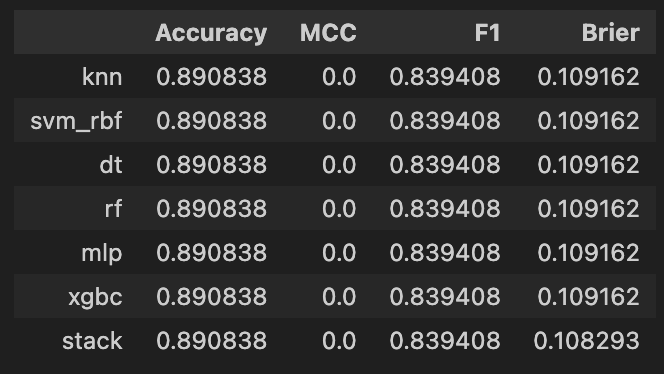

## Save model

In [47]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(svm_rbf, '../models/svm_model.joblib')
joblib.dump(xgbc, '../models/xgbc_model.joblib')
joblib.dump(stack_model, '../models/stack_model.joblib')

# Guardar listado de features para el modelo
joblib.dump(selected_columns, '../models/list_of_features.joblib')

# Cargar el modelo desde el archivo
# loaded_model = joblib.load('stack_model.joblib')

['../models/list_of_features.joblib']

In [53]:
# Guardar listado de features para el modelo
joblib.dump(selected_columns, '../models/list_of_features.joblib')

['../models/list_of_features.joblib']